In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import drjit as dr 
from matplotlib import pyplot as plt
from PDE3D import PATH
import numpy as np
from PDE3D.BoundaryShape import *
from PDE3D.utils import *
import os

In [2]:
name = "motorbike-engine"
folder_name = os.path.join(PATH, "scenes", name)
xml_name = os.path.join(folder_name, "scene.xml")
sdf_data = np.load(os.path.join(folder_name, "sdf.npy"))
cam_res = [512, 512]
res_slice = [512, 512]
spp = 512
downsample = 2
sdf_data = sdf_data[::downsample,::downsample,::downsample] - 0.001
cam_origin = mi.ScalarPoint3f([7,7,10])
scale_cam = 0.35
cam_target = mi.ScalarPoint3f([0.0,0.0,0.0])
cam_up = mi.ScalarPoint3f([0,1,0])

slice = Slice(offset =1, axis = "z", scale = 7)
cmap = "viridis"
sym = False


In [3]:
sdf1 = SDF(sdf_data, mesh_scene_xml=xml_name)
sdf2 = SDF(sdf_data, mesh_scene_xml=xml_name, render_sdf=True)

In [4]:
cam = mi.load_dict({
            "type": "orthographic",
            "to_world": mi.ScalarTransform4f().look_at(
                origin=cam_origin, target=cam_target, up=cam_up
            ).scale(1/scale_cam),
            'film_id': {
            'type': 'hdrfilm',
            'width': cam_res[0],
            'height': cam_res[1],
            'filter': { 'type': 'gaussian' }
    }
        })

In [5]:
print(sdf1.scene.bbox())
max_range_sdf = dr.max(sdf1.scene.bbox().max - sdf1.scene.bbox().min)
center_sdf = (sdf1.scene.bbox().max + sdf1.scene.bbox().min) / 2
print(max_range_sdf)
print(center_sdf)

BoundingBox3f[
  min = [-5.61107, -5.9099, -5.66656],
  max = [5.59205, 5.29322, 5.53656]
]
11.203123092651367
[-0.0095067, -0.308337, -0.0649977]


In [6]:
print(sdf1.mesh_scene.bbox())
max_range_sdf = dr.max(sdf1.mesh_scene.bbox().max - sdf1.mesh_scene.bbox().min)
center_sdf = (sdf1.mesh_scene.bbox().max + sdf1.mesh_scene.bbox().min) / 2
print(max_range_sdf)
print(center_sdf)

BoundingBox3f[
  min = [-2.24631, -2.96587, -5.39982],
  max = [2.2273, 2.3492, 5.26982]
]
10.669641494750977
[-0.00950658, -0.308337, -0.0649974]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.9538046].


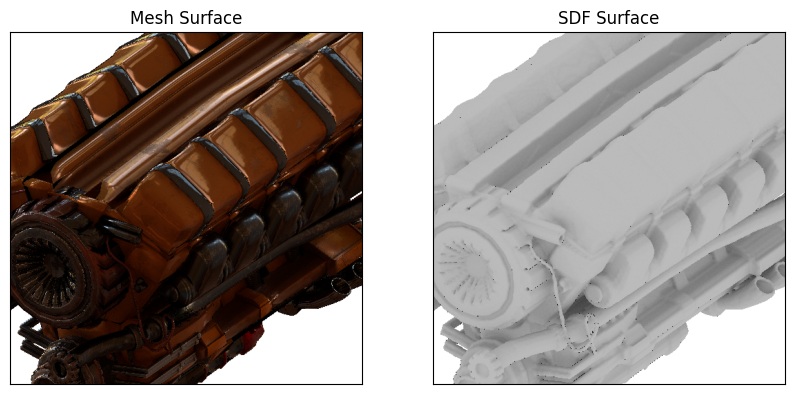

In [7]:
image1, norm1 = sdf1.visualize( colormap = cmap, cam_origin= cam_origin, cam_target= cam_target, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up)
image2, norm2 = sdf2.visualize( colormap = cmap, cam_origin= cam_origin, cam_target=cam_target, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
plot_image_3D(image1, ax1, norm = norm1, cmap = cmap)
plot_image_3D(image2, ax2, norm = norm2, cmap = cmap)
ax1.set_title("Mesh Surface")
ax2.set_title("SDF Surface")
fig.savefig("a.jpg", pad_inches = 0.0, dpi = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6095415].


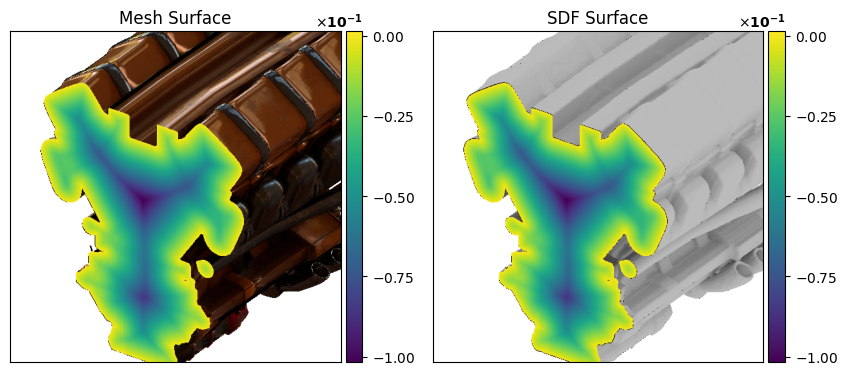

In [8]:
points, film_points = slice.create_slice_points(resolution = res_slice, spp = 1, centered = True)
sdf_vals = sdf1.grid_texture.eval(sdf1.transform.inverse() @ points)[0]
slice_image, slice_tensor = create_slice_from_result(sdf_vals, resolution = res_slice)
image1, norm1 = sdf1.visualize( colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, slice_image=slice_tensor)
image2, norm2 = sdf2.visualize( colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, slice_image = slice_tensor)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
plot_image_3D(image1, ax1, norm = norm1, cmap = cmap)
plot_image_3D(image2, ax2, norm = norm2, cmap = cmap)
ax1.set_title("Mesh Surface")
ax2.set_title("SDF Surface")
fig.savefig("b.jpg", pad_inches = 0, dpi = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6095415].


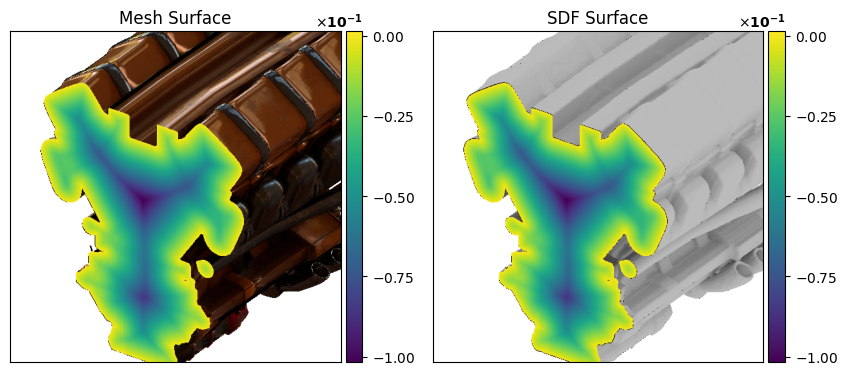

In [9]:
image1, norm1 = sdf1.visualize( colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, slice_image=slice_tensor)
image2, norm2 = sdf2.visualize( colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, slice_image = slice_tensor)
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
plot_image_3D(image1, ax1, norm = norm1, cmap = cmap)
plot_image_3D(image2, ax2, norm = norm2, cmap = cmap)
ax1.set_title("Mesh Surface")
ax2.set_title("SDF Surface")
fig.savefig("b.jpg", pad_inches = 0, dpi = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6095415].


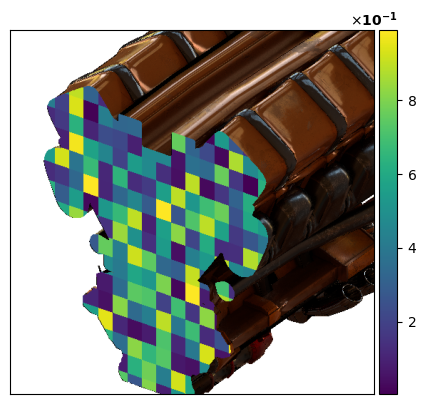

In [14]:
bbox = sdf1.bbox
bbox_pad = (bbox.max - bbox.min) / 10
bbox_coeff = mi.ScalarBoundingBox3f(bbox.min - bbox_pad, bbox.max + bbox_pad)
coeff_np = np.random.rand(16,16,16)
coeff = TextureCoefficient("a", bbox, coeff_np, interpolation = "nearest")
image, norm = sdf1.visualize( colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                            scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, coeff = coeff)
fig, ax = plt.subplots(1,1,figsize = (5,5))
plot_image_3D(image, ax, norm, cmap)

In [15]:
print(sdf1.scene.bbox())
print(sdf1.mesh_scene.bbox())
print(sdf2.scene.bbox())

BoundingBox3f[
  min = [-5.61107, -5.9099, -5.66656],
  max = [5.59205, 5.29322, 5.53656]
]
BoundingBox3f[
  min = [-2.24631, -2.96587, -5.39982],
  max = [2.2273, 2.3492, 5.26982]
]
BoundingBox3f[
  min = [-5.61107, -5.9099, -5.66656],
  max = [5.59205, 5.29322, 5.53656]
]


In [16]:
bbox1 = sdf1.scene.bbox()
bbox2 = sdf1.mesh_scene.bbox()
mean1 = (bbox1.min + bbox1.max) / 2
mean2 = (bbox2.min + bbox2.max) / 2
print(mean1)
print(mean2)
range1 = bbox1.max - bbox1.min
range2 = bbox2.max - bbox2.min
print(range1)
print(range2)
print(sdf1.bbox)

[-0.0095067, -0.308337, -0.0649977]
[-0.00950658, -0.308337, -0.0649974]
[11.2031, 11.2031, 11.2031]
[4.47361, 5.31507, 10.6696]
BoundingBox3f[
  min = [-2.20919, -2.95888, -5.38613],
  max = [2.22531, 2.36425, 5.2891]
]
